In [20]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["exp2-granularity-defaultscheduler.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance
0,hpccstream,9,16,3,16,2022-03-17T09:12:23Z,2022-03-17T09:12:34Z,2022-03-17T09:15:02Z,2022-03-17T09:15:02Z,3m23.402583507s,7.897670
1,hpccfft,5,16,4,4,2022-03-17T09:13:24Z,2022-03-17T09:13:28Z,2022-03-17T09:19:41Z,2022-03-17T09:19:43Z,7m1.118321209s,0.635284
2,hpccfft,7,16,4,4,2022-03-17T09:13:24Z,2022-03-17T09:13:30Z,2022-03-17T09:19:52Z,2022-03-17T09:19:52Z,7m0.526391337s,0.586282
3,hpccptrans,5,16,3,3,2022-03-17T09:14:24Z,2022-03-17T09:14:40Z,2022-03-17T09:25:12Z,2022-03-17T09:25:13Z,11m30.063806197s,0.062661
4,hpccptrans,1,16,3,3,2022-03-17T09:14:24Z,2022-03-17T09:14:43Z,2022-03-17T09:25:38Z,2022-03-17T09:25:38Z,11m50.062672259s,0.067209
...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-17T09:21:42Z,2022-03-17T10:04:50Z,2022-03-17T10:12:32Z,2022-03-17T10:12:33Z,51m23.007322993s,0.349650
66,hpccptrans,9,16,4,4,2022-03-17T09:23:43Z,2022-03-17T10:04:51Z,2022-03-17T10:13:42Z,2022-03-17T10:13:42Z,50m41.081714993s,0.090104
67,hpccfft,9,16,3,3,2022-03-17T09:24:44Z,2022-03-17T10:04:46Z,2022-03-17T10:12:37Z,2022-03-17T10:12:37Z,48m30.567620606s,0.365899
68,hpccrandomaccess,0,16,4,4,2022-03-17T09:26:44Z,2022-03-17T10:04:49Z,2022-03-17T10:12:57Z,2022-03-17T10:12:57Z,46m50.333722705s,0.021456


In [21]:
print (df.dtypes)

benchmark       object
times            int64
nTasks           int64
nNodes           int64
nWorkers         int64
Pending         object
Running         object
Completing      object
Completed       object
duration        object
performance    float64
dtype: object


In [22]:
from datetime import datetime
df['Pending'] = pd.to_datetime(df['Pending'], format='%Y-%m-%d')
df['Running'] = pd.to_datetime(df['Running'], format='%Y-%m-%d')
df['Completing'] = pd.to_datetime(df['Completing'], format='%Y-%m-%d')
df['Completed'] = pd.to_datetime(df['Completed'], format='%Y-%m-%d')
df['duration'] = pd.to_timedelta(df['duration'])

In [23]:
df['init'] = df['Running'] - df['Pending']
df['run'] = df['Completing'] - df['Running']
df['final'] = df['Completed'] - df['Completing']
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final
0,hpccstream,9,16,3,16,2022-03-17 09:12:23+00:00,2022-03-17 09:12:34+00:00,2022-03-17 09:15:02+00:00,2022-03-17 09:15:02+00:00,0 days 00:03:23.402583507,7.897670,0 days 00:00:11,0 days 00:02:28,0 days 00:00:00
1,hpccfft,5,16,4,4,2022-03-17 09:13:24+00:00,2022-03-17 09:13:28+00:00,2022-03-17 09:19:41+00:00,2022-03-17 09:19:43+00:00,0 days 00:07:01.118321209,0.635284,0 days 00:00:04,0 days 00:06:13,0 days 00:00:02
2,hpccfft,7,16,4,4,2022-03-17 09:13:24+00:00,2022-03-17 09:13:30+00:00,2022-03-17 09:19:52+00:00,2022-03-17 09:19:52+00:00,0 days 00:07:00.526391336,0.586282,0 days 00:00:06,0 days 00:06:22,0 days 00:00:00
3,hpccptrans,5,16,3,3,2022-03-17 09:14:24+00:00,2022-03-17 09:14:40+00:00,2022-03-17 09:25:12+00:00,2022-03-17 09:25:13+00:00,0 days 00:11:30.063806196,0.062661,0 days 00:00:16,0 days 00:10:32,0 days 00:00:01
4,hpccptrans,1,16,3,3,2022-03-17 09:14:24+00:00,2022-03-17 09:14:43+00:00,2022-03-17 09:25:38+00:00,2022-03-17 09:25:38+00:00,0 days 00:11:50.062672258,0.067209,0 days 00:00:19,0 days 00:10:55,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-17 09:21:42+00:00,2022-03-17 10:04:50+00:00,2022-03-17 10:12:32+00:00,2022-03-17 10:12:33+00:00,0 days 00:51:23.007322993,0.349650,0 days 00:43:08,0 days 00:07:42,0 days 00:00:01
66,hpccptrans,9,16,4,4,2022-03-17 09:23:43+00:00,2022-03-17 10:04:51+00:00,2022-03-17 10:13:42+00:00,2022-03-17 10:13:42+00:00,0 days 00:50:41.081714993,0.090104,0 days 00:41:08,0 days 00:08:51,0 days 00:00:00
67,hpccfft,9,16,3,3,2022-03-17 09:24:44+00:00,2022-03-17 10:04:46+00:00,2022-03-17 10:12:37+00:00,2022-03-17 10:12:37+00:00,0 days 00:48:30.567620606,0.365899,0 days 00:40:02,0 days 00:07:51,0 days 00:00:00
68,hpccrandomaccess,0,16,4,4,2022-03-17 09:26:44+00:00,2022-03-17 10:04:49+00:00,2022-03-17 10:12:57+00:00,2022-03-17 10:12:57+00:00,0 days 00:46:50.333722705,0.021456,0 days 00:38:05,0 days 00:08:08,0 days 00:00:00


In [24]:
df['start'] = df['Pending'][0]
df['afterstart'] = df['Pending'] - df['start']

In [25]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccstream,9,16,3,16,2022-03-17 09:12:23+00:00,2022-03-17 09:12:34+00:00,2022-03-17 09:15:02+00:00,2022-03-17 09:15:02+00:00,0 days 00:03:23.402583507,7.897670,0 days 00:00:11,0 days 00:02:28,0 days 00:00:00,2022-03-17 09:12:23+00:00,0 days 00:00:00
1,hpccfft,5,16,4,4,2022-03-17 09:13:24+00:00,2022-03-17 09:13:28+00:00,2022-03-17 09:19:41+00:00,2022-03-17 09:19:43+00:00,0 days 00:07:01.118321209,0.635284,0 days 00:00:04,0 days 00:06:13,0 days 00:00:02,2022-03-17 09:12:23+00:00,0 days 00:01:01
2,hpccfft,7,16,4,4,2022-03-17 09:13:24+00:00,2022-03-17 09:13:30+00:00,2022-03-17 09:19:52+00:00,2022-03-17 09:19:52+00:00,0 days 00:07:00.526391336,0.586282,0 days 00:00:06,0 days 00:06:22,0 days 00:00:00,2022-03-17 09:12:23+00:00,0 days 00:01:01
3,hpccptrans,5,16,3,3,2022-03-17 09:14:24+00:00,2022-03-17 09:14:40+00:00,2022-03-17 09:25:12+00:00,2022-03-17 09:25:13+00:00,0 days 00:11:30.063806196,0.062661,0 days 00:00:16,0 days 00:10:32,0 days 00:00:01,2022-03-17 09:12:23+00:00,0 days 00:02:01
4,hpccptrans,1,16,3,3,2022-03-17 09:14:24+00:00,2022-03-17 09:14:43+00:00,2022-03-17 09:25:38+00:00,2022-03-17 09:25:38+00:00,0 days 00:11:50.062672258,0.067209,0 days 00:00:19,0 days 00:10:55,0 days 00:00:00,2022-03-17 09:12:23+00:00,0 days 00:02:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-17 09:21:42+00:00,2022-03-17 10:04:50+00:00,2022-03-17 10:12:32+00:00,2022-03-17 10:12:33+00:00,0 days 00:51:23.007322993,0.349650,0 days 00:43:08,0 days 00:07:42,0 days 00:00:01,2022-03-17 09:12:23+00:00,0 days 00:09:19
66,hpccptrans,9,16,4,4,2022-03-17 09:23:43+00:00,2022-03-17 10:04:51+00:00,2022-03-17 10:13:42+00:00,2022-03-17 10:13:42+00:00,0 days 00:50:41.081714993,0.090104,0 days 00:41:08,0 days 00:08:51,0 days 00:00:00,2022-03-17 09:12:23+00:00,0 days 00:11:20
67,hpccfft,9,16,3,3,2022-03-17 09:24:44+00:00,2022-03-17 10:04:46+00:00,2022-03-17 10:12:37+00:00,2022-03-17 10:12:37+00:00,0 days 00:48:30.567620606,0.365899,0 days 00:40:02,0 days 00:07:51,0 days 00:00:00,2022-03-17 09:12:23+00:00,0 days 00:12:21
68,hpccrandomaccess,0,16,4,4,2022-03-17 09:26:44+00:00,2022-03-17 10:04:49+00:00,2022-03-17 10:12:57+00:00,2022-03-17 10:12:57+00:00,0 days 00:46:50.333722705,0.021456,0 days 00:38:05,0 days 00:08:08,0 days 00:00:00,2022-03-17 09:12:23+00:00,0 days 00:14:21


In [26]:
df['benchmark'].unique()

array(['hpccstream', 'hpccfft', 'hpccptrans', 'hpccrandomringbw',
       'hpccrandomringlat', 'hpccdgemm', 'hpccrandomaccess'], dtype=object)

In [27]:
df['nWorkers'].unique()

array([16,  4,  3,  1,  2])

#  performance

In [28]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_performance = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_mean' : mean(x['performance']),
                  'model_time_std' : std(x['performance']),
              })).reset_index()
            df_performance.append(df_senario)

In [29]:
df_performance = pd.concat(df_performance, axis=0)
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std
0,hpccstream,16,3,16,6.760250,0.762061
1,hpccstream,16,2,16,6.571367,0.370772
2,hpccstream,16,1,16,6.564247,0.679687
0,hpccfft,16,4,4,0.655132,0.065832
0,hpccfft,16,1,1,11.949733,1.044214
0,hpccfft,16,2,2,0.756187,0.174688
0,hpccfft,16,3,3,0.357774,0.008124
0,hpccptrans,16,3,3,0.088068,0.024091
0,hpccptrans,16,1,1,8.551240,0.764860
0,hpccptrans,16,2,2,1.079625,1.309073


    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccstream      16       3        16         6.760250        0.762061
1  hpccstream      16       2        16         6.571367        0.370772
2  hpccstream      16       1        16         6.564247        0.679687
  benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0   hpccfft      16       4         4         0.655132        0.065832
0   hpccfft      16       1         1        11.949733        1.044214
0   hpccfft      16       2         2         0.756187        0.174688
0   hpccfft      16       3         3         0.357774        0.008124
    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccptrans      16       3         3         0.088068        0.024091
0  hpccptrans      16       1         1         8.551240        0.764860
0  hpccptrans      16       2         2         1.079625        1.309073
0  hpccptrans      16       4         4         0.090104     

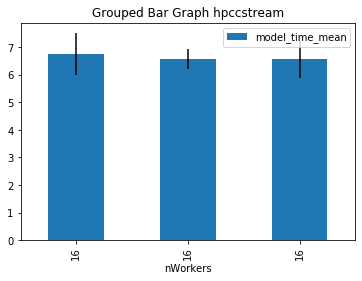

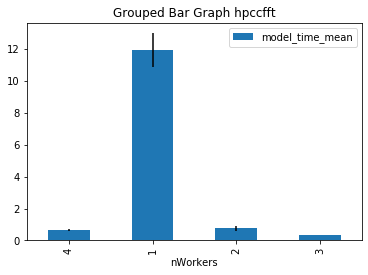

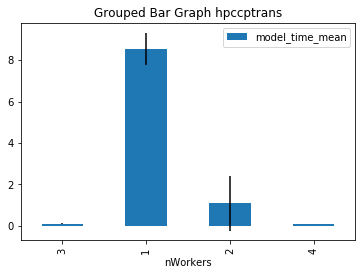

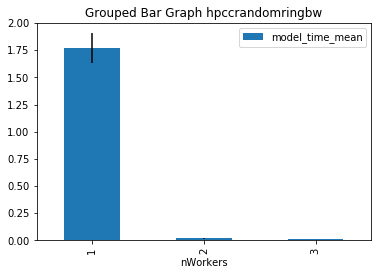

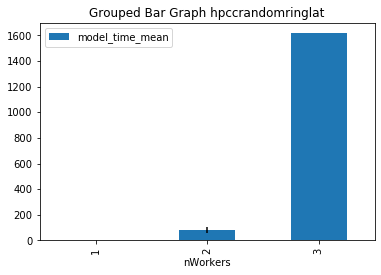

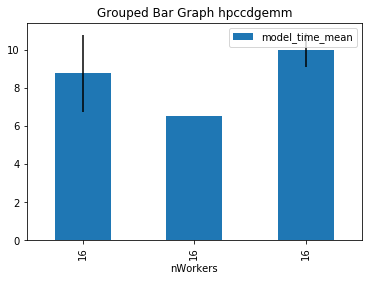

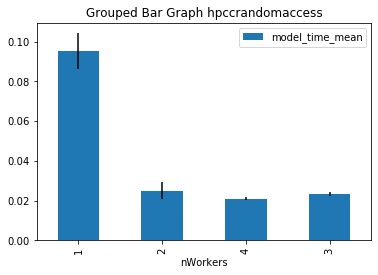

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

#  time slot

In [31]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_mean' : mean(x['init']),
                  'init_std' : std(x['init']),
                'run_mean' : mean(x['run']),
                  'run_std' : std(x['run']),
                'final_mean' : mean(x['final']),
                  'final_std' : std(x['final']),
                'duration_mean' : mean(x['duration']),
                  'duration_std' : std(x['duration']),
              })).reset_index()
            df_time.append(df_senario)

In [32]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std
0,hpccstream,16,3,16,0 days 00:11:40.500000,0 days 00:14:52.541455619,0 days 00:02:03.500000,0 days 00:00:22.455511572,0 days 00:00:00.500000,0 days 00:00:00.500000,0 days 00:14:26.026749180,0 days 00:14:51.298270579
1,hpccstream,16,2,16,0 days 00:23:14,0 days 00:08:56.964306697,0 days 00:02:03.333333333,0 days 00:00:12.036980056,0 days 00:00:00.333333333,0 days 00:00:00.471404520,0 days 00:26:00.966849992,0 days 00:09:04.243786543
2,hpccstream,16,1,16,0 days 00:32:03,0 days 00:07:04.970587217,0 days 00:02:05.333333333,0 days 00:00:13.021349989,0 days 00:00:00,0 days 00:00:00,0 days 00:34:53.832297584,0 days 00:07:10.380545355
0,hpccfft,16,4,4,0 days 00:08:01.666666666,0 days 00:11:14.108959211,0 days 00:05:34.333333333,0 days 00:01:01.157356239,0 days 00:00:00.666666666,0 days 00:00:00.942809041,0 days 00:14:13.966003432,0 days 00:10:12.557667935
0,hpccfft,16,1,1,0 days 00:20:52.333333333,0 days 00:07:40.420339351,0 days 00:01:13.333333333,0 days 00:00:05.906681715,0 days 00:00:00.333333333,0 days 00:00:00.471404520,0 days 00:22:40.852586010,0 days 00:07:43.159760103
0,hpccfft,16,2,2,0 days 00:25:08,0 days 00:11:59,0 days 00:04:21.500000,0 days 00:00:22.500000,0 days 00:00:00,0 days 00:00:00,0 days 00:30:07.582260195,0 days 00:11:36.499179902
0,hpccfft,16,3,3,0 days 00:41:35,0 days 00:01:33,0 days 00:07:46.500000,0 days 00:00:04.500000,0 days 00:00:00.500000,0 days 00:00:00.500000,0 days 00:49:56.787471799,0 days 00:01:26.219851193
0,hpccptrans,16,3,3,0 days 00:06:19.500000,0 days 00:10:06.680517241,0 days 00:09:05.250000,0 days 00:01:42.182129063,0 days 00:00:00.500000,0 days 00:00:00.500000,0 days 00:16:04.674608798,0 days 00:08:50.292273609
0,hpccptrans,16,1,1,0 days 00:30:30,0 days 00:00:10,0 days 00:01:35,0 days 00:00:00,0 days 00:00:01,0 days 00:00:00,0 days 00:32:43.442647986,0 days 00:00:04.363656495
0,hpccptrans,16,2,2,0 days 00:33:27.666666666,0 days 00:03:43.571514782,0 days 00:05:14.333333333,0 days 00:02:11.899793614,0 days 00:00:00.333333333,0 days 00:00:00.471404520,0 days 00:39:20.482757089,0 days 00:01:32.250644613


<ipython-input-33-850cf490fa20>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-33-850cf490fa20>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



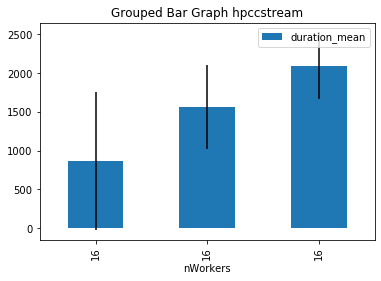

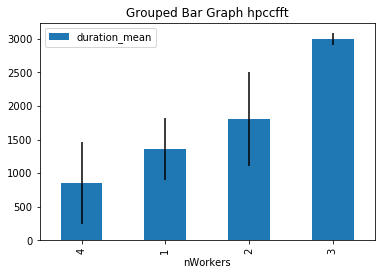

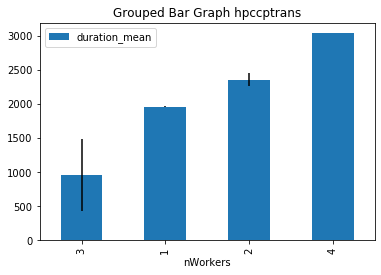

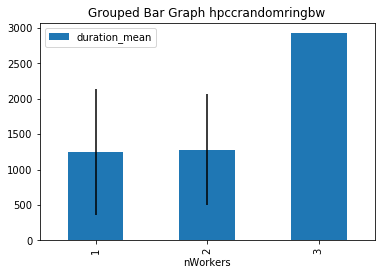

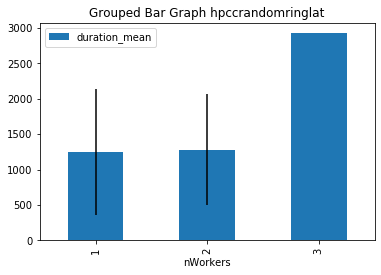

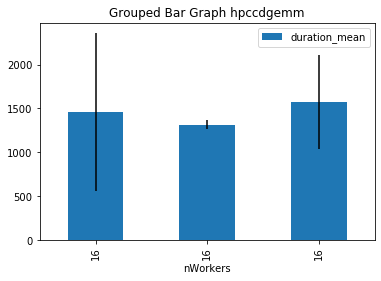

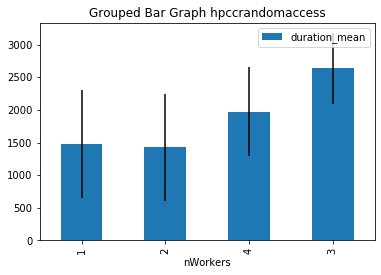

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_mean'] = df_bench['duration_mean'].dt.total_seconds()
    df_bench['duration_std'] = df_bench['duration_std'].dt.total_seconds()

    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='duration_mean',
                  yerr='duration_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

In [34]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nTasks in df_bench.nTasks.unique():
            df_senario = df_bench[df_bench.nTasks == nTasks]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_sum' : sum(x['init'].dt.total_seconds()),
                'run_sum' : sum(x['run'].dt.total_seconds()),
                'final_sum' : sum(x['final'].dt.total_seconds()),
                'duration_sum' : sum(x['duration'].dt.total_seconds()),
              })).reset_index()
            df_time.append(df_senario)

In [35]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,init_sum,run_sum,final_sum,duration_sum
0,hpccstream,16,12753.0,1240.0,3.0,14428.504439
0,hpccfft,16,13208.0,2679.0,4.0,16253.195232
0,hpccptrans,16,13669.0,3845.0,5.0,17908.113717
0,hpccrandomringbw,16,12853.0,1012.0,5.0,14241.953298
0,hpccrandomringlat,16,12853.0,1012.0,5.0,14241.953298
0,hpccdgemm,16,8457.0,5730.0,1.0,14637.110445
0,hpccrandomaccess,16,15146.0,2899.0,4.0,18418.644500


<ipython-input-36-1521fc477d73>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



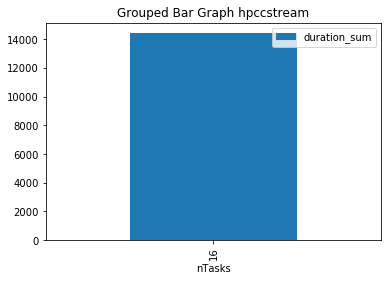

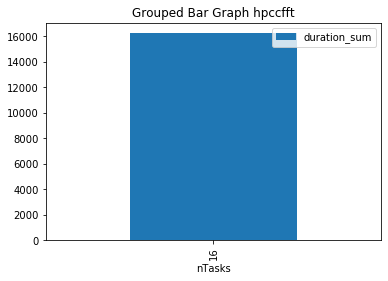

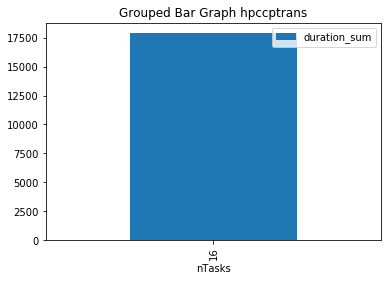

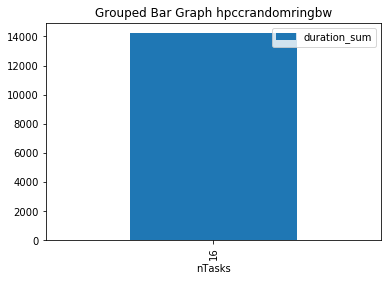

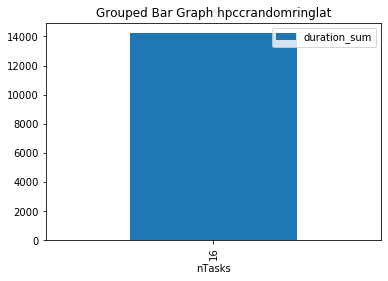

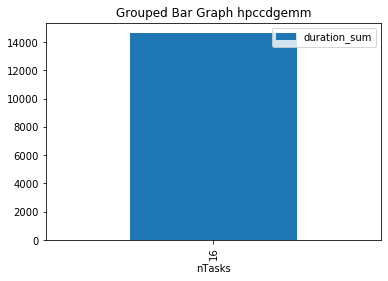

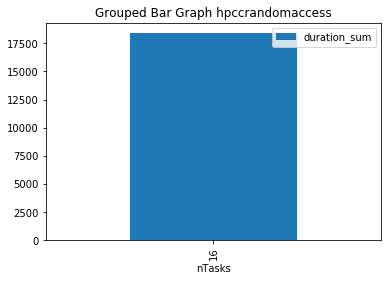

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_sum'] = df_bench['duration_sum']

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_sum',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

# Graph

In [37]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccstream,9,16,3,16,2022-03-17 09:12:23+00:00,2022-03-17 09:12:34+00:00,2022-03-17 09:15:02+00:00,2022-03-17 09:15:02+00:00,0 days 00:03:23.402583507,7.897670,0 days 00:00:11,0 days 00:02:28,0 days 00:00:00,2022-03-17 09:12:23+00:00,0 days 00:00:00
1,hpccfft,5,16,4,4,2022-03-17 09:13:24+00:00,2022-03-17 09:13:28+00:00,2022-03-17 09:19:41+00:00,2022-03-17 09:19:43+00:00,0 days 00:07:01.118321209,0.635284,0 days 00:00:04,0 days 00:06:13,0 days 00:00:02,2022-03-17 09:12:23+00:00,0 days 00:01:01
2,hpccfft,7,16,4,4,2022-03-17 09:13:24+00:00,2022-03-17 09:13:30+00:00,2022-03-17 09:19:52+00:00,2022-03-17 09:19:52+00:00,0 days 00:07:00.526391336,0.586282,0 days 00:00:06,0 days 00:06:22,0 days 00:00:00,2022-03-17 09:12:23+00:00,0 days 00:01:01
3,hpccptrans,5,16,3,3,2022-03-17 09:14:24+00:00,2022-03-17 09:14:40+00:00,2022-03-17 09:25:12+00:00,2022-03-17 09:25:13+00:00,0 days 00:11:30.063806196,0.062661,0 days 00:00:16,0 days 00:10:32,0 days 00:00:01,2022-03-17 09:12:23+00:00,0 days 00:02:01
4,hpccptrans,1,16,3,3,2022-03-17 09:14:24+00:00,2022-03-17 09:14:43+00:00,2022-03-17 09:25:38+00:00,2022-03-17 09:25:38+00:00,0 days 00:11:50.062672258,0.067209,0 days 00:00:19,0 days 00:10:55,0 days 00:00:00,2022-03-17 09:12:23+00:00,0 days 00:02:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-17 09:21:42+00:00,2022-03-17 10:04:50+00:00,2022-03-17 10:12:32+00:00,2022-03-17 10:12:33+00:00,0 days 00:51:23.007322993,0.349650,0 days 00:43:08,0 days 00:07:42,0 days 00:00:01,2022-03-17 09:12:23+00:00,0 days 00:09:19
66,hpccptrans,9,16,4,4,2022-03-17 09:23:43+00:00,2022-03-17 10:04:51+00:00,2022-03-17 10:13:42+00:00,2022-03-17 10:13:42+00:00,0 days 00:50:41.081714993,0.090104,0 days 00:41:08,0 days 00:08:51,0 days 00:00:00,2022-03-17 09:12:23+00:00,0 days 00:11:20
67,hpccfft,9,16,3,3,2022-03-17 09:24:44+00:00,2022-03-17 10:04:46+00:00,2022-03-17 10:12:37+00:00,2022-03-17 10:12:37+00:00,0 days 00:48:30.567620606,0.365899,0 days 00:40:02,0 days 00:07:51,0 days 00:00:00,2022-03-17 09:12:23+00:00,0 days 00:12:21
68,hpccrandomaccess,0,16,4,4,2022-03-17 09:26:44+00:00,2022-03-17 10:04:49+00:00,2022-03-17 10:12:57+00:00,2022-03-17 10:12:57+00:00,0 days 00:46:50.333722705,0.021456,0 days 00:38:05,0 days 00:08:08,0 days 00:00:00,2022-03-17 09:12:23+00:00,0 days 00:14:21


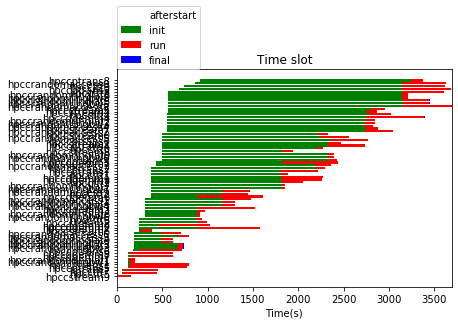

In [38]:
import numpy as np
import matplotlib.pyplot as plt

color=['white','green','red','blue']

y1 = df['afterstart'].dt.total_seconds()
y2 = df['init'].dt.total_seconds()
y3 = df['run'].dt.total_seconds()
y4 = df['final'].dt.total_seconds()

labels = df['benchmark']+df['times'].map(str)

plt.barh(labels, y1, color='white', label='afterstart')
plt.barh(labels, y2, left=y1, color='green', label='init')
plt.barh(labels, y3, left=y1+y2, color='red', label='run')
plt.barh(labels, y4, left=y1+y2+y3, color='blue', label='final')

plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
plt.legend(loc=[0, 1])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
plt.show()
